RT60 Extrapolation Algorithm. By Amiel Jacob P. Antonio and Paulo Miguel F. Soria, undergraduate students of the University of San Carlos, Department of Physics. 

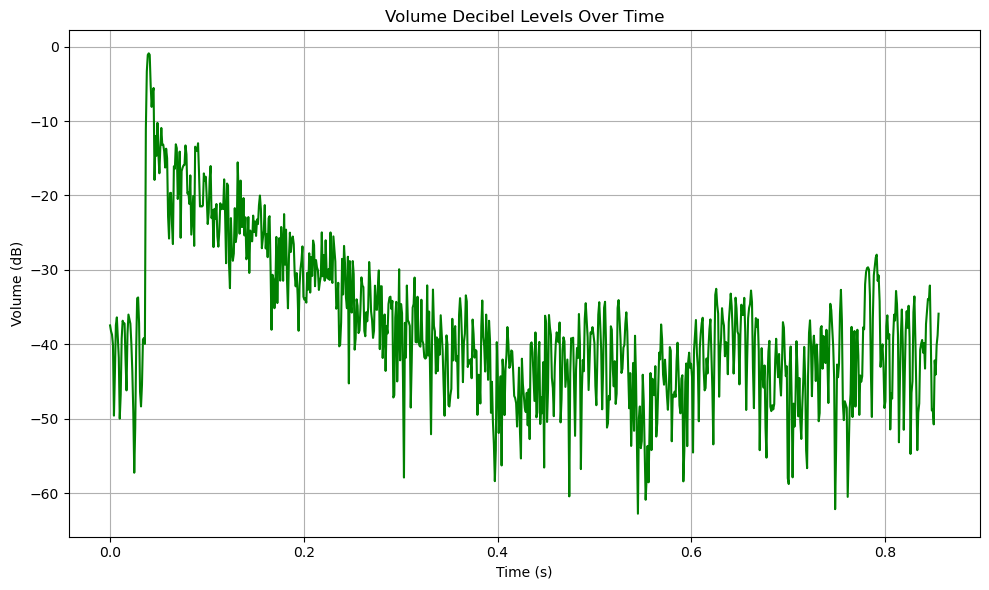

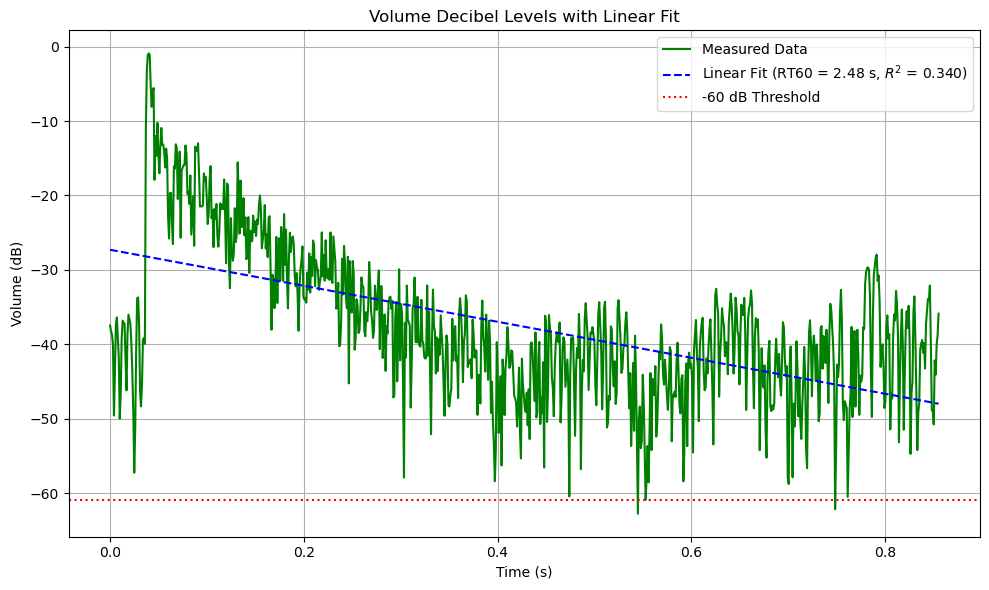

RT60 (based on slope): 2.48 seconds
R-squared value of the fit: 0.340


In [3]:
#RT60 Extrapolation Algorithm
import wave
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate dB from RMS
def calculate_db(rms):
    return 20 * np.log10(rms) if rms > 0 else -np.inf

# Open the WAV file
wav_file = wave.open(r"C:\Users\cebua\Music\FORFIG.wav", "r")

# Ensure it's a mono file
if wav_file.getnchannels() != 1:
    print("This script only handles mono files. Exiting.")
    sys.exit(0)

# Get the frame rate (sampling rate) and total frames
frame_rate = wav_file.getframerate()
total_frames = wav_file.getnframes()
chunk_size = int(frame_rate / 1000)  # Process chunks

# Initialize variables
time_stamps = []
decibel_levels = []

# Read and process the file in chunks
for i in range(0, total_frames, chunk_size):
    # Read a chunk of audio frames
    frames = wav_file.readframes(chunk_size)
    # Convert to NumPy array
    signal = np.frombuffer(frames, dtype=np.int16)
    # Normalize the signal
    signal_normalized = signal / np.iinfo(np.int16).max
    # Calculate RMS
    rms = np.sqrt(np.mean(signal_normalized**2))
    # Convert RMS to decibels
    decibel_level = calculate_db(rms)
    # Append the decibel level and time stamp
    time_stamps.append(i / frame_rate)
    decibel_levels.append(decibel_level)

wav_file.close()

# Plot the decibel levels over time
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, decibel_levels, color="green")
plt.title("Volume Decibel Levels Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Volume (dB)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform linear fit on decibel levels
coefficients = np.polyfit(time_stamps, decibel_levels, 1)  # Linear fit
slope, intercept = coefficients
decibel_fit = np.polyval(coefficients, time_stamps)  # Evaluate the fit line
RT60 = -60 / slope  # Time for a 60 dB drop based on the slope

# Calculate R-squared
ss_res = np.sum((np.array(decibel_levels) - decibel_fit) ** 2)
ss_tot = np.sum((np.array(decibel_levels) - np.mean(decibel_levels)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate the fitted line for visualization
time_fit = np.linspace(0, max(time_stamps), 500)
decibel_fit_continuous = np.polyval(coefficients, time_fit)

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, decibel_levels, label="Measured Data", color="green")
plt.plot(time_fit, decibel_fit_continuous, label=f"Linear Fit (RT60 = {RT60:.2f} s, $R^2$ = {r_squared:.3f})", color="blue", linestyle="--")
plt.axhline(y=max(decibel_levels) - 60, color="red", linestyle=":", label="-60 dB Threshold")
plt.title("Volume Decibel Levels with Linear Fit")
plt.xlabel("Time (s)")
plt.ylabel("Volume (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print RT60 and R-squared values
print(f"RT60 (based on slope): {RT60:.2f} seconds")
print(f"R-squared value of the fit: {r_squared:.3f}")
